# Trabajo final de Cosmología de Presición
*para la aprobación de la materia Cosmología de Presición dictada por Claudia Scóccola en 2024*

*por Juan I. Iribarren.*

## **Tema 1:** Evolución del Universo homogéneo y en expansión (background):

1) Elija un conjunto de parámetros cosmológicos, y grafique la evolución del parámetro de Hubble.
Muestre a través de un gráfico, cómo depende de cada uno de los parámetros de densidad.
2) Grafique las distancias de luminosidad, de diámetro angular, y la distancia comóvil.
3) Grafique $a(t)$
4) Grafique $z(t)$, y tome ciertos valores representativos de momentos claves de la evolución del
Universo (BBN, equality, recombinación, reionización, pico de formación estelar (sSFR), época
actual, y algún otro momento que considere relevante), y exprese dichas épocas en tiempo cósmico,
en redshift $z$, en valor del factor de escala $a$, y en escala de energía medida en temperatura $K$.

In [1]:

import classy as classy
from classy import Class
import matplotlib.pyplot as plt
import matplotlib as mat
import numpy as np
import scipy.constants as cte
#from ipywidgets.widgets import *


In [2]:

planck_18 = dict()
planck_18['ombh2'] = 0.02238   ## Omega_b * h**2
planck_18['omch2'] = 0.12011  ## Omega_c * h**2
planck_18['H0'] = 67.32   ##   H0 = 100h
planck_18['h'] = planck_18['H0']/100
planck_18['Oc'] = planck_18['omch2']/planck_18['h']**2
planck_18['Ob'] = planck_18['ombh2']/planck_18['h']**2

c = cte.speed_of_light/1000

In [3]:
PlanckParams = {'H0': planck_18['H0'], 'Omega_b': planck_18['Ob'], 'Omega_cdm': planck_18['Oc']}

ModOb = [
    {'H0': planck_18['H0'], 'Omega_b': planck_18['Ob']*0.5, 'Omega_cdm': planck_18['Oc']},
    {'H0': planck_18['H0'], 'Omega_b': planck_18['Ob']*1.5, 'Omega_cdm': planck_18['Oc']}
]

ModOc = [
    {'H0': planck_18['H0'], 'Omega_b': planck_18['Ob'], 'Omega_cdm': planck_18['Oc']*0.5},
    {'H0': planck_18['H0'], 'Omega_b': planck_18['Ob'], 'Omega_cdm': planck_18['Oc']*1.5}
]

In [4]:
def GetBackground(parameters):
    cosmo = Class()
    cosmo.empty()
    cosmo.set(parameters)
    cosmo.compute()
    
    return cosmo.get_background(), parameters

In [5]:
BG_Planck, Pm_Planck = GetBackground(PlanckParams)
BG_ModOc = [GetBackground(x)[0] for x in ModOc]
Pm_ModOc = [GetBackground(x)[1]["Omega_b"] for x in ModOc]
BG_ModOb = [GetBackground(x)[0] for x in ModOb]
Pm_ModOb = [GetBackground(x)[1]["Omega_cdm"] for x in ModOc]


BG_Planck.keys()

dict_keys(['z', 'proper time [Gyr]', 'conf. time [Mpc]', 'H [1/Mpc]', 'comov. dist.', 'ang.diam.dist.', 'lum. dist.', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_b', '(.)rho_cdm', '(.)rho_lambda', '(.)rho_ur', '(.)rho_crit', '(.)rho_tot', '(.)p_tot', '(.)p_tot_prime', 'gr.fac. D', 'gr.fac. f'])

Text(0, 0.5, '$H(z)$ / $\\frac{m}{s} \\frac{1}{Mpc}$')

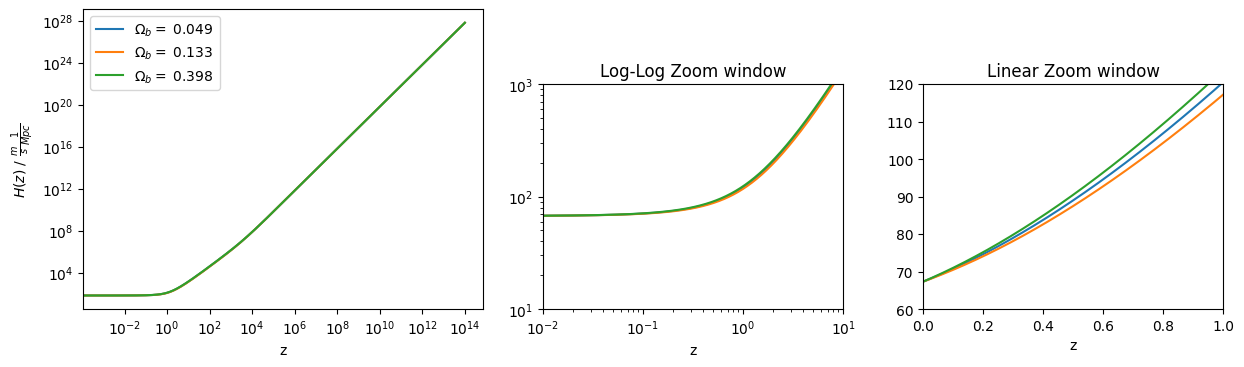

In [6]:
fig = plt.figure(1, figsize=(4, 3))
ax1 = fig.add_axes([0, 0, 1, 1])

ax1.loglog(BG_Planck["z"], BG_Planck["H [1/Mpc]"]*c, label = r"$\Omega_b =$ "+str(round(Pm_Planck["Omega_b"],3)))

j = 0
for BG_Mod in BG_ModOb:
    ax1.loglog(BG_Mod["z"], BG_Mod["H [1/Mpc]"]*c, label = r"$\Omega_b =$ "+str(round(Pm_ModOb[j],3)))
    j = j+1

ax1.set(autoscale_on=True)
ax1.legend()

ax2 = fig.add_axes([1.15, 0, 0.75, 0.75])

ax2.loglog(BG_Planck["z"], BG_Planck["H [1/Mpc]"]*c)

for BG_Mod in BG_ModOb:
    ax2.loglog(BG_Mod["z"], BG_Mod["H [1/Mpc]"]*c)
    
ax2.set(xlim=(1e-2, 1e1), ylim=(1e1, 1e3), autoscale_on=False, title='Log-Log Zoom window')

ax3 = fig.add_axes([2.10, 0, 0.75, 0.75])

ax3.plot(BG_Planck["z"], BG_Planck["H [1/Mpc]"]*c)

for BG_Mod in BG_ModOb:
    ax3.plot(BG_Mod["z"], BG_Mod["H [1/Mpc]"]*c)
    
ax3.set(xlim=(0, 1), ylim=(60, 120), autoscale_on=False, title='Linear Zoom window')

for ax in fig.axes:
    ax.set_xlabel("z")

ax1.set_ylabel(r"$H(z)$ / $\frac{m}{s} \frac{1}{Mpc}$")
    

Text(0, 0.5, '$H(z)$ / $\\frac{m}{s} \\frac{1}{Mpc}$')

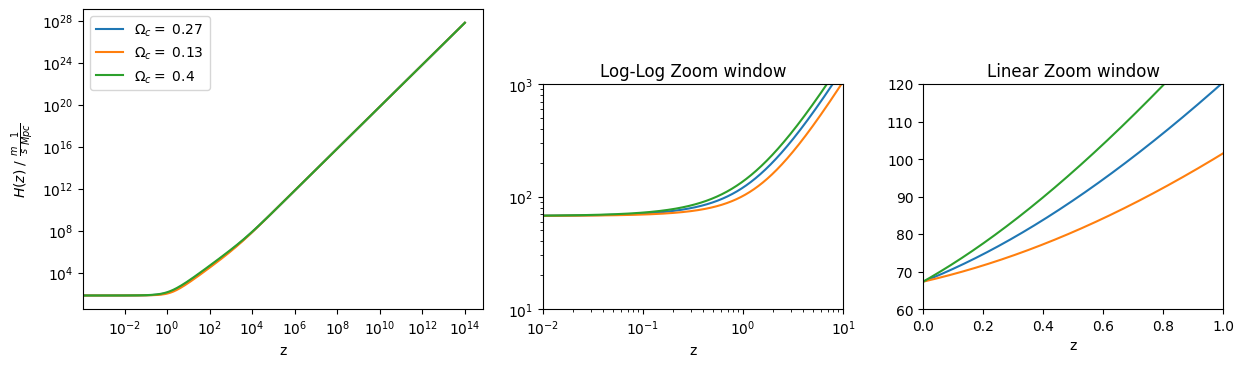

In [7]:
fig = plt.figure(1, figsize=(4, 3))
ax1 = fig.add_axes([0, 0, 1, 1])

ax1.loglog(BG_Planck["z"], BG_Planck["H [1/Mpc]"]*c, label = r"$\Omega_c =$ "+str(round(Pm_Planck["Omega_cdm"],2)))

j = 0
for BG_Mod in BG_ModOc:
    ax1.loglog(BG_Mod["z"], BG_Mod["H [1/Mpc]"]*c, label = r"$\Omega_c =$ "+str(round(Pm_ModOb[j],2)))
    j = j+1
ax1.set(autoscale_on=True)
ax1.legend()

ax2 = fig.add_axes([1.15, 0, 0.75, 0.75])

ax2.loglog(BG_Planck["z"], BG_Planck["H [1/Mpc]"]*c)

for BG_Mod in BG_ModOc:
    ax2.loglog(BG_Mod["z"], BG_Mod["H [1/Mpc]"]*c)
    
ax2.set(xlim=(1e-2, 1e1), ylim=(1e1, 1e3), autoscale_on=False, title='Log-Log Zoom window')

ax3 = fig.add_axes([2.10, 0, 0.75, 0.75])

ax3.plot(BG_Planck["z"], BG_Planck["H [1/Mpc]"]*c)

for BG_Mod in BG_ModOc:
    ax3.plot(BG_Mod["z"], BG_Mod["H [1/Mpc]"]*c)
    
ax3.set(xlim=(0, 1), ylim=(60, 120), autoscale_on=False, title='Linear Zoom window')

for ax in fig.axes:
    ax.set_xlabel("z")

ax1.set_ylabel(r"$H(z)$ / $\frac{m}{s} \frac{1}{Mpc}$")

Text(0, 0.5, '$d_L(z)$ / m')

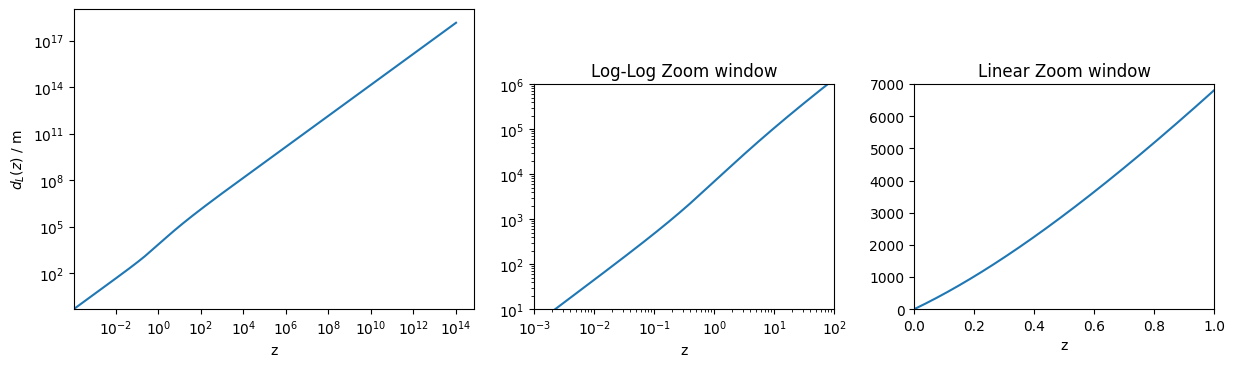

In [8]:
fig = plt.figure(1, figsize=(4, 3))
ax1 = fig.add_axes([0, 0, 1, 1])

ax1.loglog(BG_Planck["z"], BG_Planck["lum. dist."])

ax1.set(autoscale_on=True)

ax2 = fig.add_axes([1.15, 0, 0.75, 0.75])

ax2.loglog(BG_Planck["z"], BG_Planck["lum. dist."])

ax2.set(xlim=(1e-3, 1e2), ylim=(1e1, 1e6), autoscale_on=False, title='Log-Log Zoom window')

ax3 = fig.add_axes([2.10, 0, 0.75, 0.75])

ax3.plot(BG_Planck["z"], BG_Planck["lum. dist."])

ax3.set(xlim=(0, 1), ylim=(0, 7e3), autoscale_on=False, title='Linear Zoom window')


for ax in fig.axes:
    ax.set_xlabel("z")

ax1.set_ylabel(r"$d_L(z)$ / m")

Text(0, 0.5, '$d_\\theta(z)$ / m')

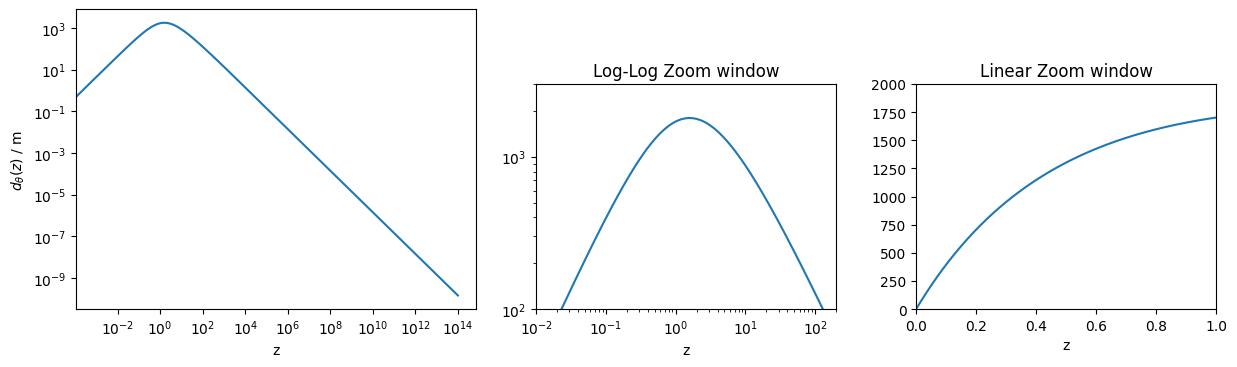

In [9]:
fig = plt.figure(1, figsize=(4, 3))
ax1 = fig.add_axes([0, 0, 1, 1])

ax1.loglog(BG_Planck["z"], BG_Planck['ang.diam.dist.'])

ax1.set(autoscale_on=True)


ax2 = fig.add_axes([1.15, 0, 0.75, 0.75])

ax2.loglog(BG_Planck["z"], BG_Planck['ang.diam.dist.'])

ax2.set(xlim=(1e-2, 2e2), ylim=(1e2, 3e3), autoscale_on=False, title='Log-Log Zoom window')

ax3 = fig.add_axes([2.10, 0, 0.75, 0.75])

ax3.plot(BG_Planck["z"], BG_Planck['ang.diam.dist.'])

ax3.set(xlim=(0, 1), ylim=(0, 2e3), autoscale_on=False, title='Linear Zoom window')


for ax in fig.axes:
    ax.set_xlabel("z")

ax1.set_ylabel(r"$d_\theta(z)$ / m")

Text(0, 0.5, '$\\eta(z)$ / m')

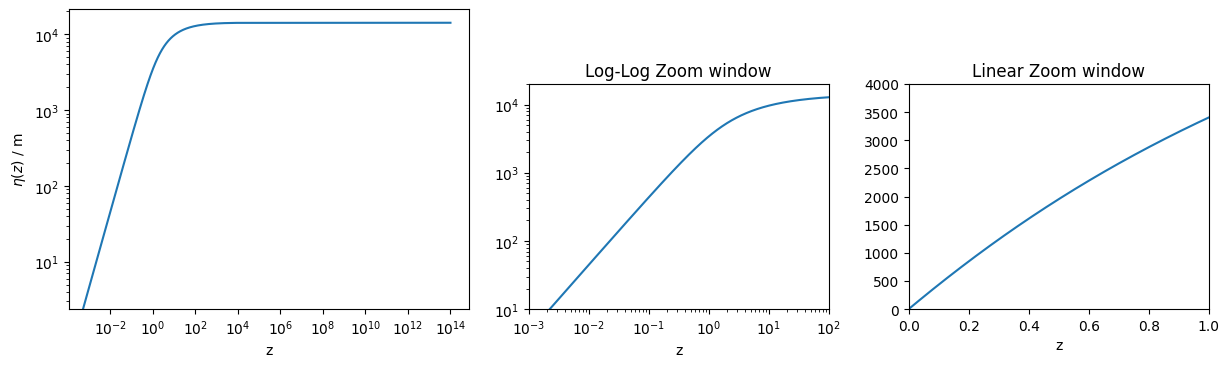

In [10]:
fig = plt.figure(1, figsize=(4, 3))
ax1 = fig.add_axes([0, 0, 1, 1])

ax1.loglog(BG_Planck["z"], BG_Planck['comov. dist.'])
ax1.set(autoscale_on=True)

ax2 = fig.add_axes([1.15, 0, 0.75, 0.75])

ax2.loglog(BG_Planck["z"], BG_Planck['comov. dist.'])

ax2.set(xlim=(1e-3, 1e2), ylim=(1e1, 2e4), autoscale_on=False, title='Log-Log Zoom window')

ax3 = fig.add_axes([2.10, 0, 0.75, 0.75])

ax3.plot(BG_Planck["z"], BG_Planck['comov. dist.'])

ax3.set(xlim=(0, 1), ylim=(0, 4e3), autoscale_on=False, title='Linear Zoom window')

for ax in fig.axes:
    ax.set_xlabel("z")

ax1.set_ylabel(r"$\eta(z)$ / m")

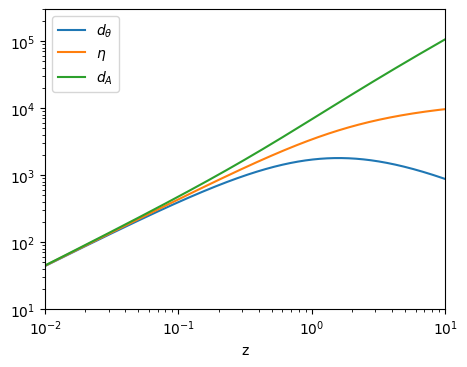

In [11]:
fig = plt.figure(1, figsize=(4, 3))
ax1 = fig.add_axes([0, 0, 1, 1])

ax1.loglog(BG_Planck["z"], BG_Planck['ang.diam.dist.'], label = r"$d_\theta$")
ax1.loglog(BG_Planck["z"], BG_Planck['comov. dist.'], label = r"$\eta$")
ax1.loglog(BG_Planck["z"], BG_Planck["lum. dist."], label = r"$d_A$")
ax1.set_xlabel("z")
ax1.set(xlim=(1e-2, 1e1), ylim=(1e1, 3e5), autoscale_on=False)
ax1.legend()


Text(0, 0.5, '$a(t)$')

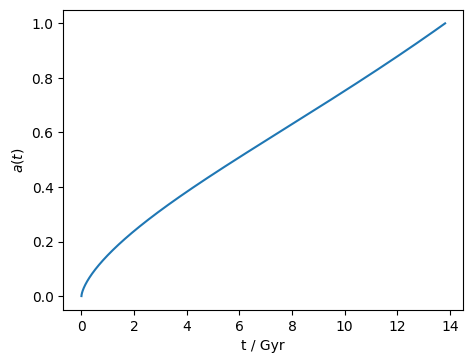

In [12]:
fig = plt.figure(1, figsize=(4, 3))
ax1 = fig.add_axes([0, 0, 1, 1])

a = 1/(1+(BG_Planck["z"]))

ax1.plot(BG_Planck["proper time [Gyr]"], a)

ax1.set_xlabel("t / Gyr")

ax1.set_ylabel(r"$a(t)$")

In [13]:
z_BBN = 10e10 #https://ned.ipac.caltech.edu/level5/March04/Steigman3/paper.pdf
z_equality = 3407 #https://arxiv.org/pdf/1807.06209
z_recombinacion = 7.68 #https://arxiv.org/pdf/1807.06209
z_reionizacion = 6 #https://arxiv.org/pdf/1403.0007 , p.58 
z_sSFR = 1.85 #https://arxiv.org/pdf/1403.0007 , p.63 
z_hoy = 0 

z_relevant = {"BBN":z_BBN, "eq":z_equality,
    "recombination":z_recombinacion,
    "reionization":z_reionizacion,
    "sSFR":z_sSFR,"today":z_hoy}

Text(0, 0.5, '$z(t)$')

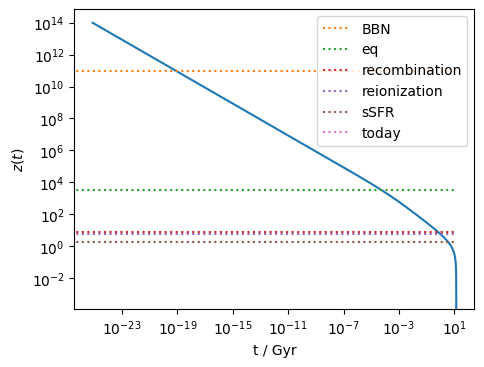

In [14]:
fig = plt.figure(1, figsize=(4, 3))
ax1 = fig.add_axes([0, 0, 1, 1])

ax1.loglog(BG_Planck["proper time [Gyr]"], BG_Planck["z"])

for label, y in z_relevant.items():
    ax1.plot([0, 13.8], [y]*2, linestyle=":", label = label)

ax1.legend()

ax1.set_xlabel("t / Gyr")

ax1.set_ylabel(r"$z(t)$")


In [15]:
from scipy.interpolate import interp1d

t_of_z = interp1d(BG_Planck["z"], BG_Planck["proper time [Gyr]"])


In [16]:
import pandas as pd

Equivalences = pd.DataFrame(index= z_relevant.keys())

Equivalences["z"] = z_relevant.values()

Equivalences["a"] = 1/(1+Equivalences["z"])

Equivalences["T [K]"] = 2.7255/Equivalences["a"]

Equivalences["t [Gyr]"] = t_of_z(Equivalences["z"])

Equivalences

,z,a,T [K],t [Gyr]
BBN,1.000000e+11,1.000000e-11,2.725500e+11,7.559521e-20
eq,3.407000e+03,2.934272e-04,9.288504e+03,5.083976e-05
recombination,7.680000e+00,1.152074e-01,2.365734e+01,6.724948e-01
reionization,6.000000e+00,1.428571e-01,1.907850e+01,9.287442e-01
sSFR,1.850000e+00,3.508772e-01,7.767675e+00,3.530860e+00
today,0.000000e+00,1.000000e+00,2.725500e+00,1.381435e+01


Text(0.5, 0, 't / Gyr')

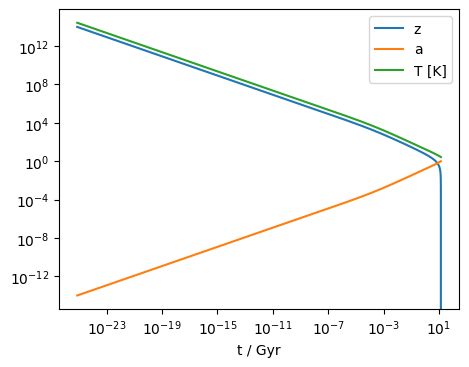

In [17]:
fig = plt.figure(1, figsize=(4, 3))
ax1 = fig.add_axes([0, 0, 1, 1])

ax1.loglog(BG_Planck["proper time [Gyr]"], BG_Planck["z"], label = "z")
ax1.loglog(BG_Planck["proper time [Gyr]"], 1/(1+BG_Planck["z"]), label = "a")
ax1.loglog(BG_Planck["proper time [Gyr]"], 2.7255*(1+BG_Planck["z"]), label = "T [K]")

ax1.legend()

ax1.set_xlabel("t / Gyr")


## **Tema 2:** Formación de estructuras

## **Tema 3:** Fondo Cósmico de Radiación

In [24]:
#####################################################
#
# Cosmological parameters and other CLASS parameters
#
#####################################################
common_settings = {# LambdaCDM parameters
                   'h':0.67810,
                   'omega_b':0.02238280,
                   'omega_cdm': 0.1201075,
                   'A_s':2.100549e-09,
                   'tau_reio': 0.05430842}

l_max_scalars = 3000
l_max_tensors = 600

# Note that for l_max_tensors =600 we can keep default precision,
# while for for l_max_tensors = 3000 we would need to import many high precision settings from the file cl_ref.pre    

In [25]:
###############
#    
# call CLASS : scalars only
#
###############
#
M = Class()
M.set(common_settings)
M.set({'output':'tCl,pCl','modes':'s','lensing':'no','n_s':0.9660499,
       'l_max_scalars':l_max_scalars})
M.compute()
cls = M.raw_cl(l_max_scalars)

In [26]:
###############
#    
# call CLASS : tensors only
#
###############
#
M.empty() # reset input parameters to default, before passing a new parameter set
M.set(common_settings)
M.set({'output':'tCl,pCl','modes':'t','lensing':'no','r':0.1,'n_t':0,
       'l_max_tensors':l_max_tensors})
M.compute()
clt = M.raw_cl(l_max_tensors)

In [27]:
###############
#    
# call CLASS : scalars + tensors (only in this case we can get the correct lensed ClBB)
#
###############
#
M.empty() # reset input parameters to default, before passing a new parameter set
M.set(common_settings)
M.set({'output':'tCl,pCl,lCl','modes':'s,t','lensing':'yes','n_s':0.9660499,'r':0.1,'n_t':0,
       'l_max_scalars':l_max_scalars,'l_max_tensors':l_max_tensors})
M.compute()
cl_tot = M.raw_cl(l_max_scalars)
cl_lensed = M.lensed_cl(l_max_scalars)

In [28]:
# modules and esthetic definitions for the plots
#
# uncomment to get plots displayed in notebook
%matplotlib inline
#
import matplotlib
import matplotlib.pyplot as plt
#
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
#matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

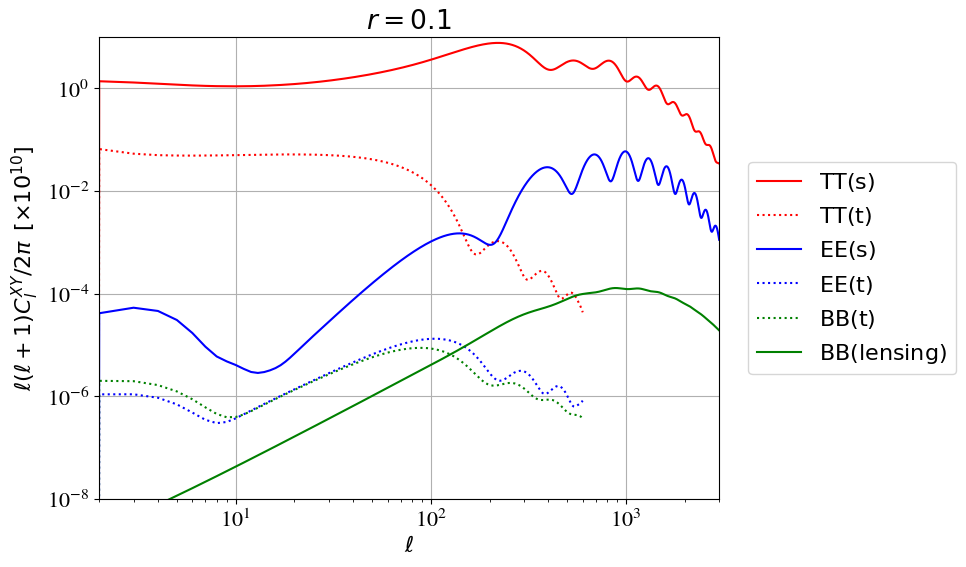

In [30]:
#################
#
# plotting
#
#################
#
plt.xlim([2,l_max_scalars])
plt.ylim([1.e-8,10])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi \,\,\, [\times 10^{10}]$")
plt.title(r"$r=0.1$")
plt.grid()
#
ell = cl_tot['ell']
ellt = clt['ell']
factor = 1.e10*ell*(ell+1.)/2./np.pi
factort = 1.e10*ellt*(ellt+1.)/2./np.pi
#
plt.loglog(ell,factor*cls['tt'],'r-',label=r'$\mathrm{TT(s)}$')
plt.loglog(ellt,factort*clt['tt'],'r:',label=r'$\mathrm{TT(t)}$')
plt.loglog(ell,factor*cls['ee'],'b-',label=r'$\mathrm{EE(s)}$')
plt.loglog(ellt,factort*clt['ee'],'b:',label=r'$\mathrm{EE(t)}$')
plt.loglog(ellt,factort*clt['bb'],'g:',label=r'$\mathrm{BB(t)}$')
plt.loglog(ell,factor*(cl_lensed['bb']-cl_tot['bb']),'g-',label=r'$\mathrm{BB(lensing)}$')
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))

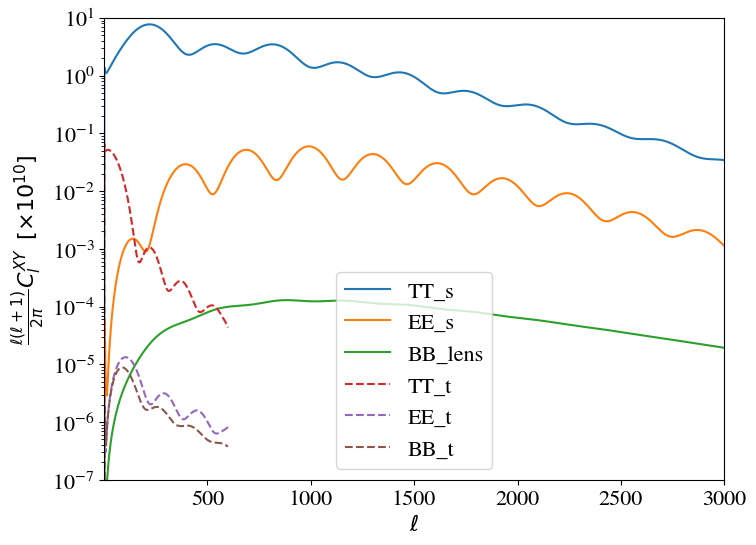

In [45]:
ell = cl_tot['ell']
ellt = clt['ell']
factor = 1.e10*ell*(ell+1.)/2./np.pi
factort = 1.e10*ellt*(ellt+1.)/2./np.pi

ScalarAnisotropies = {"TT_s" : factor*cls['tt'],
                      "EE_s" : factor*cls['ee'],
                      "BB_lens" : factor*(cl_lensed['bb']-cl_tot['bb'])
                     }

TensorAnisotropies = {"TT_t" : factort*clt['tt'],
                      "EE_t" : factort*clt['ee'],
                      "BB_t" : factort*clt['bb']
                     }
for key in ScalarAnisotropies.keys():
    plt.semilogy(ell, ScalarAnisotropies[key], "-", label = str(key))

for key in TensorAnisotropies.keys():
    plt.semilogy(ellt, TensorAnisotropies[key], "--", label = str(key))

plt.xlim([2,l_max_scalars])
plt.ylim([1.e-7,10])

plt.xlabel(r"$\ell$")
plt.ylabel(r"$\frac{\ell (\ell+1)}{2\pi} C_l^{XY} \,\,\, [\times 10^{10}]$")
plt.legend()

In [46]:
from scipy.signal import find_peaks

ScalarPeaks = {}
TensorPeaks = {}

for key in ScalarAnisotropies.keys():
    peak_for_key, peak_prop = find_peaks(ScalarAnisotropies[key])
    ScalarPeaks[key] = peak_for_key

for key in TensorAnisotropies.keys():
    peak_for_key, _ = find_peaks(TensorAnisotropies[key])
    TensorPeaks[key] = peak_for_key


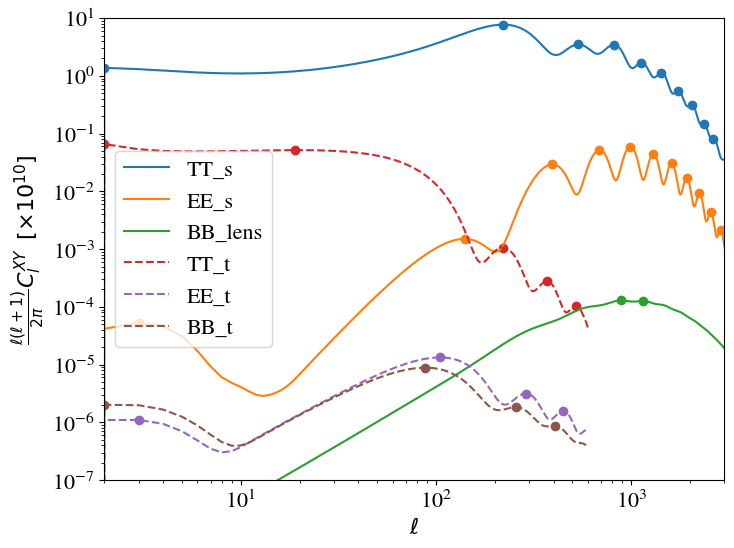

In [49]:
for key in ScalarAnisotropies.keys():
    plt.loglog(ell, ScalarAnisotropies[key], "-", label = str(key))

for key in TensorAnisotropies.keys():
    plt.loglog(ellt, TensorAnisotropies[key], "--", label = str(key))

for key in ScalarPeaks.keys():
    plt.scatter(ScalarPeaks[key], ScalarAnisotropies[key][ScalarPeaks[key]])

for key in TensorPeaks.keys():
    plt.scatter(TensorPeaks[key], TensorAnisotropies[key][TensorPeaks[key]])

plt.xlim([2,l_max_scalars])
plt.ylim([1.e-7,10])

plt.xlabel(r"$\ell$")
plt.ylabel(r"$\frac{\ell (\ell+1)}{2\pi} C_l^{XY} \,\,\, [\times 10^{10}]$")
plt.legend()

In [57]:
Comparison = pd.DataFrame()

for key in ScalarPeaks.keys():
    Comparison = pd.concat([Comparison, pd.DataFrame(ScalarAnisotropies[key][ScalarPeaks[key]], columns=[key+"_max"])], axis=1)

for key in TensorPeaks.keys():
    Comparison = pd.concat([Comparison, pd.DataFrame(TensorAnisotropies[key][TensorPeaks[key]], columns=[key+"_max"])], axis=1)

Comparison["TT_s_max/EE_s_max"] = Comparison["TT_s_max"]/Comparison["EE_s_max"]

Comparison["TT_t_max/EE_t_max"] = Comparison["TT_t_max"]/Comparison["EE_t_max"]

Comparison["TT_t_max/BB_t_max"] = Comparison["TT_t_max"]/Comparison["BB_t_max"]

Comparison


,TT_s_max,EE_s_max,BB_lens_max,TT_t_max,EE_t_max,BB_t_max,TT_s_max/EE_s_max,TT_t_max/EE_t_max,TT_t_max/BB_t_max
0,1.382210,0.000054,0.000130,0.065952,0.000001,2.015997e-06,25812.116784,59814.759204,32714.565540
1,7.720320,0.001504,0.000127,0.051902,0.000013,8.850235e-06,5132.379285,3896.879946,5864.474093
2,3.508536,0.029242,NaN,0.001061,0.000003,1.833645e-06,119.981630,336.139519,578.654631
3,3.482752,0.051930,NaN,0.000280,0.000002,8.698979e-07,67.065990,175.375269,321.903058
4,1.703961,0.059592,NaN,0.000105,NaN,NaN,28.593547,NaN,NaN
5,1.139182,0.043837,NaN,NaN,NaN,NaN,25.986663,NaN,NaN
6,0.545158,0.030491,NaN,NaN,NaN,NaN,17.879271,NaN,NaN
7,0.316844,0.016740,NaN,NaN,NaN,NaN,18.927023,NaN,NaN
8,0.146796,0.009210,NaN,NaN,NaN,NaN,15.938682,NaN,NaN
9,0.079610,0.004344,NaN,NaN,NaN,NaN,18.327891,NaN,NaN


In [ ]:
common_settings = {# LambdaCDM parameters
                   'h':0.67810,
                   'omega_b':0.02238280,
                   'omega_cdm': 0.1201075,
                   'A_s':2.100549e-09,
                   'tau_reio': 0.05430842}

l_max_scalars = 3000
l_max_tensors = 600


In [ ]:
M.empty()
M = Class()
M.set(common_settings)
M.set({'output':'tCl,pCl','modes':'s','lensing':'no','n_s':0.9660499,
       'l_max_scalars':l_max_scalars})
M.compute()
cls = M.raw_cl(l_max_scalars)

In [ ]:
M.empty() # reset input parameters to default, before passing a new parameter set
M.set(common_settings)
M.set({'output':'tCl,pCl','modes':'t','lensing':'no','r':0.1,'n_t':0,
       'l_max_tensors':l_max_tensors})
M.compute()
clt = M.raw_cl(l_max_tensors)

In [ ]:
M.empty() # reset input parameters to default, before passing a new parameter set
M.set(common_settings)
M.set({'output':'tCl,pCl,lCl','modes':'s,t','lensing':'yes','n_s':0.9660499,'r':0.1,'n_t':0,
       'l_max_scalars':l_max_scalars,'l_max_tensors':l_max_tensors})
M.compute()
cl_tot = M.raw_cl(l_max_scalars)
cl_lensed = M.lensed_cl(l_max_scalars)